<a href="https://colab.research.google.com/github/carvalheirafc/data_science_min_projects/blob/master/lin_regression/plane_crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Planes Crash Linear Regression Project
 > Linear Regression using [SKLEARN API](https://scikit-learn.org/stable/) to predict planes crashes.
 
 > Dataset from [kaggle.com](https://www.kaggle.com/nguyenhoc/plane-crash)
 
 > Tutorials followed in this book: [100-Days-Of-ML-Code](https://github.com/Avik-Jain/100-Days-Of-ML-Code)
 
 #### Objectives:
  - Create a feature to represent only a year of the accident.
  - Computate every year total accidents.
  - Use some histoy of accidents to train the model.
  - Compare predicted total accidents with the computed. (Cross the informations to compare the results).

In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [0]:
file_url = 'https://raw.githubusercontent.com/carvalheirafc/data_science_min_projects/master/data/planecrashinfo_20181121001952.csv'

planes_crash = pd.read_csv(file_url)
planes_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
date            5783 non-null object
time            5783 non-null object
location        5783 non-null object
operator        5783 non-null object
flight_no       5783 non-null object
route           5783 non-null object
ac_type         5783 non-null object
registration    5783 non-null object
cn_ln           5783 non-null object
aboard          5783 non-null object
fatalities      5783 non-null object
ground          5783 non-null object
summary         5783 non-null object
dtypes: object(13)
memory usage: 587.4+ KB


In [0]:
"""
set_year = return a list with only a year from this specific datetime format.
iterable = Some object-like series, list, etc.

"""
def set_year(iterable):
  year_feature = []
  for it in iterable:
    year = it[-4] + it[-3] + it[-2] + it[-1]
    year_feature.append(year)

  return year_feature

In [0]:
"""
Creation of a new feature on planes_crash with only the Year of the accident

"""
planes_crash['Accident Year'] = set_year(planes_crash['date'])

"""
New data set with only two features:
Year: The year of accidents
Total Accidents: Number of total accidents that happend in this year.

"""
crash_year = pd.DataFrame()
crash_year['Year'] = planes_crash['Accident Year'].value_counts().index
crash_year['Total Accidents'] = planes_crash['Accident Year'].value_counts().values
crash_year = crash_year.sort_values(by='Year')
crash_year = crash_year.reset_index(drop=True)

In [0]:
"""
Start to train and predict some values.
The data year variate from 1908 to 2018. So the plan is uses all the data from 
1999 ~ 2017, to the train and predict the values to the last year(2018), and finally 
compare to the actual value from this last years.

I choose olny recently years to my project because the value of accidents before that have alot of 
granularity and much more high values than the last years. So futher maybe I'll return to this project
to do the analytics needed to uses this values.

"""
"""
X = 1999 ~ 2017
Y = 1999.total_accidents ~ 2017.total_accidents
last_year_X = 2018
last_year_Y = 2018.total_accidents

"""
X = crash_year['Year'].iloc[len(crash_year['Year'])-20:len(crash_year['Year'])-1].values.reshape(-1, 1)
Y = crash_year['Total Accidents'].iloc[len(crash_year['Year'])-20:len(crash_year['Year'])-1].values.reshape(-1, 1)

last_year_X = crash_year['Year'].iloc[len(crash_year['Year'])-1:].values.reshape(-1, 1)
last_year_Y = crash_year['Total Accidents'].iloc[len(crash_year['Year'])-1:].values.reshape(-1, 1)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0) 

In [0]:
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [0]:
"""
Added 2018 year to X_pred variable
Y_pred = predicted values from selected years.

"""
X_pred = np.append(X_test, last_year_X)
X_pred = X_pred.reshape(-1, 1)
Y_pred = regressor.predict(X_pred)

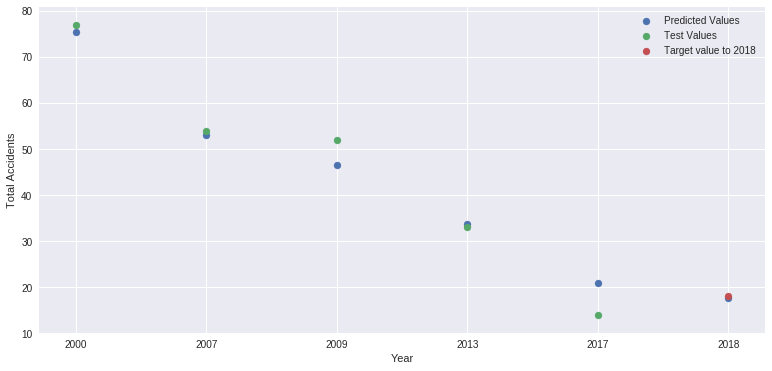

In [0]:
fig, ax = plt.subplots(figsize=(13, 6))
plt.scatter(X_pred, Y_pred, label='Predicted Values')
plt.scatter(X_test, Y_test, label='Test Values')
plt.scatter(last_year_X, last_year_Y, label='Target value to 2018')

plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.show()